In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Database Setup

engine = create_engine("sqlite:///hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()
#print(Base.classes.__getattr__)


['measurement', 'station']

In [7]:
# We can view all of the classes that automap found

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

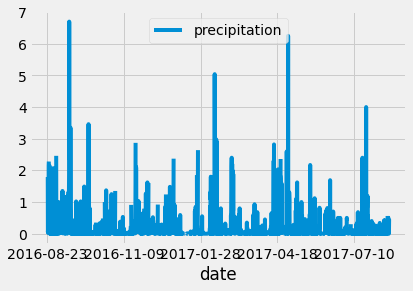

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
prev_year = dt.date(2017, 8, 23)- dt.timedelta(days=365)

#Starting from the last data point in the database. 
results = session.query(Measurement.date, Measurement.prcp)


# Calculate the date one year from the last date in data set.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Perform a query to retrieve the data and precipitation scores
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


# List the stations and the counts in descending order.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

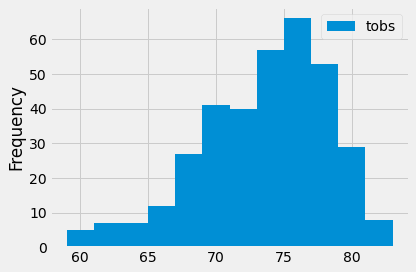

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(Measurement.tobs)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram!

In [16]:
!pip install -U Flask

Requirement already up-to-date: Flask in /Users/shanicebrown/opt/anaconda3/lib/python3.7/site-packages (1.1.2)


In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [18]:
from sqlalchemy import extract
import pandas as pd 

In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import datetime as dt

In [21]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [23]:
# reflect an existing database into a new model 
Base = automap_base()

# reflect the tables 
Base.prepare(engine, reflect=True)


In [24]:
# Save reference to each table 
Measurement = Base.classes.measurement 
Station = Base.classes.station 

In [25]:
# Create our session (link) from python to the DB 
session = Session(engine)

In [26]:
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6)
june_temp_list = [temp.tobs for temp in june_temps]
print(np.mean(june_temp_list))

74.94411764705882


In [27]:
june_df = pd.DataFrame(june_temp_list, columns=["temps"])
june_df.describe()

,temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [28]:
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12)
dec_temp_list = [temp.tobs for temp in dec_temps]
print(np.mean(dec_temp_list))

71.04152933421226


In [29]:
dec_df = pd.DataFrame(dec_temp_list, columns=["temps"])
dec_df.describe()

,temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
